# What is a Graph?


## Undirected Graphs

A *graph* $G$ consists of a nonempty set, $V(G)$, called the *vertices* of $G$, and a set $E(G)$ called the *edges* of $G$. An element of $V(G)$ is called a *vertex*. A vertex is also called a *node*; the words "vertex" and "node" are used interchangeably. An element of $E(G)$ is an *undirected* edge or simply an "edge". An undirected edge has two vertices $u\neq v$ called its endpoints. Such an edge can be represented by the two element set $\{u, v\}$. The notation $\langle u—v \rangle$ denotes this edge.
Both $\langle u—v \rangle$ and $\langle v—u \rangle$ define the same undirected edge, whose endpoints are $u$ and $v$.

![](./images/graph_example.png)

For example, let $H$ be the graph pictured in Figure above. The vertices of $H$
correspond to the nine dots, that is, $V(H) = \{a,b,c,d,e,f,g,h,i\}$

The edges correspond to the eight lines, that is,

$E(H) = \big\{\langle a—b \rangle,\langle a—c \rangle,\langle b—d \rangle,\langle c—d \rangle,\langle c—e \rangle,\langle e—f \rangle,\langle e—g \rangle,\langle h—i \rangle\big\} $


## Directed Graphs

A *directed graph* -or *digraph*- $G$ consists of a nonempty set $V(G)$, called the vertices of $G$, and a set $E(G)$, called the edges of $G$. An element of $V(G)$ is called a *vertex*. A vertex is also called a *node*; the words "vertex" and "node" are used interchangeably. An element of $E(G)$ is called a *directed edge*. A directed edge is also called an "arrow" or simply an "edge". A directed edge starts at some vertex $u$ called the *tail* of the edge, and ends at some vertex $v$ called the *head* of the edge.

![](./images/digraph_example.png)


### Vertex Degrees

The *in-degree* of a vertex in a digraph is the number of arrows coming into it, and similarly its *out-degree* is the number of arrows out of it. More precisely,

If $G$ is a *digraph* and $v \in V(G)$, then 
    
  * $indeg(v) ::= \big\vert e \in \{E(G)\, \vert\, head(e) = v \}\big\vert$
  * $outdeg(v) ::= \big\vert e \in \{E(G)\, \vert\, tail(e) = v \}\big\vert$


##### References:
The definitions above and the illustrations are taken from the book:
*Mathematics for Computer Science*, Eric Lehman, F. Tom Leighton, Albert R. Meyer
https://courses.csail.mit.edu/6.042/spring17/mcs.pdf

# Name Generator

Lets generate a directed graph -a social network-, which expresses endorsements between various people similar as in *LinkedIn*. The nodes of our digraph will be persons and the edges will represent endorsments. 


For the nodes, we will generate a set of "random" people. That is, we generate names as given in the USA randomly. A list of US American names can be received here:
http://www.census.gov/topics/population/genealogy/data/1990_census/1990_census_namefiles.html


In the following we download the files and generate three lists, one for female names, one for male names, and one for surnames.

In [1]:
import webget
import random


surnames_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.all.last'
female_names_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.female.first'
male_names_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.male.first'

webget.download(surnames_txt, to='./last_names.txt')
webget.download(female_names_txt, to='./female_names.txt')
webget.download(male_names_txt, to='./male_names.txt')


def get_names_from(file):
    names = []
    with open(file) as f:
        for line in f:
            name = line.split(' ')[0].title()
            names.append(name)
            
    return names

names = get_names_from('./last_names.txt')
female_names = get_names_from('./female_names.txt')
male_names = get_names_from('./male_names.txt')

print(len(names), len(female_names), len(male_names))

88799 4275 1219


In [2]:
%%bash
ls -ltr *names.txt

-rw-r--r--  1 rhp  staff  3107965 Oct 29 15:27 last_names.txt
-rw-r--r--  1 rhp  staff   149625 Oct 29 15:27 female_names.txt
-rw-r--r--  1 rhp  staff    42665 Oct 29 15:27 male_names.txt


We decide to let names be a two-element tuple consisting of a name and a surname.

In [3]:
def random_combination(list_a, list_b):
    a = random.choice(list_a)
    b = random.choice(list_b)
    
    return (a, b)


def generate_random_names(amount=1, gender='female'):
    pre_names = (female_names, male_names)
    
    if gender == 'female':
        pre_names = pre_names[0]
    elif gender == 'male':
        pre_names = pre_names[1]
    elif gender == 'random':
        pre_names = random.choice(pre_names)

    random_names = []
    for idx in range(0, amount):    
        random_name = random_combination(pre_names, names)
        random_names.append(random_name)
        
    return random_names
    
generate_random_names(amount=10, gender='random')

[('Patrice', 'Mcdole'),
 ('Garnet', 'Gavel'),
 ('Leandra', 'Lamia'),
 ('Joanne', 'Chausse'),
 ('Lauryn', 'Grewe'),
 ('Junita', 'Brainard'),
 ('Marylee', 'Allwood'),
 ('Dreama', 'Dorazio'),
 ('Shawna', 'Whitfill'),
 ('Brittni', 'Cashwell')]

# Generating Nodes

Now, that we have our name generator in place we are good to start generating our *endorsment graph*.

For our example graph, we decide that it contains 100 persons, i.e., 100 nodes. Half of the nodes represents women and the other half represents men.

In [4]:
total_no_nodes = 100
no_nodes_per_gender = total_no_nodes // 2

female_names_list = generate_random_names(amount=no_nodes_per_gender, gender='female')
male_names_list = generate_random_names(amount=no_nodes_per_gender, gender='male')

all_names_list = female_names_list + male_names_list
person_list = all_names_list

print(len(all_names_list))
print(all_names_list[:20])

100
[('Eleanore', 'Disano'), ('Desiree', 'Rentoulis'), ('Gemma', 'Maedche'), ('Mariella', 'Nottingham'), ('Kaylene', 'Eldred'), ('Nada', 'Bagron'), ('Karina', 'Sendro'), ('Song', 'Macha'), ('Rosann', 'Soong'), ('Lena', 'Batter'), ('Blossom', 'Frasure'), ('Zoila', 'Petrak'), ('Earleen', 'Ragsdale'), ('Marielle', 'Mccrohan'), ('Branda', 'Camberos'), ('Shalon', 'Mcnay'), ('Pamelia', 'Noack'), ('Margart', 'Biondi'), ('Miyoko', 'Rohwer'), ('Janene', 'Caronna')]


# Generating Edges

endorsements randomly


Additionally, we say that it is not possible for a person to endorse herself.

In [ ]:
%%bash
conda install -y tqdm

In [30]:
from tqdm import tqdm
from random import randint
from numpy.random import choice


def get_no_endorsments():
    relation_classes = {
        0: (0, 0),
        1: (1, 4),
        2: (5, 10),
        3: (11, 20),
        4: (21, 50),
        5: (51, 100)
    }
    p_distribution = [0.05, 0.36, 0.45, 0.1, 0.035, 0.005]

    no_relation_class = choice(list(relation_classes.keys()), 
                               p=p_distribution)
    no_endorsments = randint(relation_classes[no_relation_class][0], 
                             relation_classes[no_relation_class][1])
    return no_endorsments


def create_endorsements(node_list):
    """Creates a list of graph edges
    like [(1,10), (50,4), (99,20000), ...]"""
    endorsements = []
    idx_list = range(len(node_list))

    for idx, name_pair in tqdm(enumerate(node_list)):
        # get how many people this person (name_pair) endorses
        no_endorsments = get_no_endorsments()
        if no_endorsments > 0:
            # get a list of potential endorsements
            potential_endorsment_idxs = random.sample(idx_list, no_endorsments)
            if idx in potential_endorsment_idxs:
                # Removing myself in case I am in the list
                # cannot endorse myself
                idx_me_in_endorsements = potential_endorsment_idxs.index(idx)
                del potential_endorsment_idxs[idx_me_in_endorsements]
    
            endorsements += list(zip([idx for _ in range(len(potential_endorsment_idxs))], 
                                     potential_endorsment_idxs))
    return endorsements

endorsements = create_endorsements(person_list)

print(endorsements[:30])
print(person_list)

100it [00:00, 14658.22it/s]

[(0, 59), (0, 15), (0, 94), (1, 7), (1, 39), (1, 73), (1, 0), (2, 79), (2, 37), (2, 57), (2, 0), (2, 6), (2, 85), (2, 66), (2, 24), (3, 57), (3, 24), (3, 98), (3, 9), (3, 62), (3, 74), (3, 33), (3, 97), (3, 14), (3, 22), (3, 35), (3, 44), (3, 43), (3, 95), (3, 94)]
[('Eleanore', 'Disano'), ('Desiree', 'Rentoulis'), ('Gemma', 'Maedche'), ('Mariella', 'Nottingham'), ('Kaylene', 'Eldred'), ('Nada', 'Bagron'), ('Karina', 'Sendro'), ('Song', 'Macha'), ('Rosann', 'Soong'), ('Lena', 'Batter'), ('Blossom', 'Frasure'), ('Zoila', 'Petrak'), ('Earleen', 'Ragsdale'), ('Marielle', 'Mccrohan'), ('Branda', 'Camberos'), ('Shalon', 'Mcnay'), ('Pamelia', 'Noack'), ('Margart', 'Biondi'), ('Miyoko', 'Rohwer'), ('Janene', 'Caronna'), ('Elmira', 'Blommel'), ('Janna', 'Simitian'), ('Amberly', 'Makler'), ('Eneida', 'Schemm'), ('Cinthia', 'Colangelo'), ('Patricia', 'Spannbauer'), ('Alesia', 'Robishaw'), ('Golden', 'Mcleoud'), ('Lily', 'Trumbauer'), ('Veronique', 'Maddern'), ('Mitzi', 'Havey'), ('Cindie', 'Cero

In [ ]:
%%bash
conda install -y networkx=1.11
pip install pygraphviz

In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

100


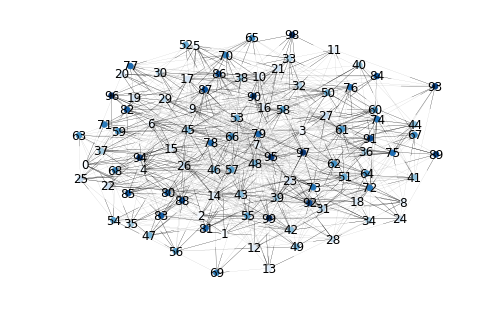

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout, write_dot


def create_graph():
    graph = nx.DiGraph()
    graph.clear()

    # add node by node, needed to add attributes...
    print(len(all_names_list))

    for idx, name_pair in enumerate(all_names_list):
        graph.add_node(idx, name=' '.join(name_pair))
    
    # graph.add_nodes_from(all_names_list)
    graph.add_edges_from(endorsements)

    return graph


def draw_graph(graph):
    nx.draw(graph, pos=graphviz_layout(graph), 
            node_size=30, width=.05, cmap=plt.cm.Blues, 
            with_labels=True, node_color=range(len(graph)))
    
graph = create_graph()
draw_graph(graph)

#nx.write_gml(graph, './social_network.gml')

In [32]:
print(graph.node[10]['name'])
print(graph.out_degree(10))
print(graph.out_edges(10))
print(graph.node[graph.out_edges(10)[0][1]])
print(graph.in_edges(10))

Blossom Frasure
5
[(10, 71), (10, 50), (10, 46), (10, 97), (10, 96)]
{'name': 'Carlton Winslow'}
[(7, 10), (49, 10), (57, 10), (58, 10), (66, 10), (77, 10)]


In [43]:
# print(graph.node)
print(graph.number_of_nodes())

100


## Who is the most interesting person in out network?

Likely, you are tempted to find the person in the graph, which has the highest in-degree. For example with code similar to the following.

In [34]:
import numpy as np


in_deg_vec = np.array([graph.in_degree(n) for n in graph.nodes()])
max_ind_deg = in_deg_vec.max()
print(np.argmax(in_deg_vec))
print(graph.node[np.argmax(in_deg_vec)]['name'])

4
Kaylene Eldred


However, there is an issue with this solution. To make yourself the most interesting person you would just have to create a lot of profiles of people endorsing you. This issue can be overcome by applying the *PageRank* algorithm.

In [ ]:
d = 0.85
n = graph.number_of_nodes()
sub_term = (1 - d) / n

def page_rank(p):
    
    page_rank = sub_term  + (d * pass)
    return page_rank

# PageRank Algorithm



![from_book](images/pr_descr.png)

##### References:
The above description is from *Artificial Intelligence: A Modern Approach Third Edition* by Stuart J. Russell and Peter Norvig.

## Let's Implement PageRank Together!

Perhaps it is best, when we start implementing a function that encodes the *PageRank* formula.


$PR(p) = \frac{1-d}{N} + d \sum_{i}^{} \frac{PR(in_{i})}{C(in_{i})}$

In [44]:
import numpy as np


GLOBAL_PR = np.ones(graph.number_of_nodes())


def page_rank(node):
    damping = 0.85
    n = graph.number_of_nodes()
    pr_in = np.array([GLOBAL_PR[remote] for remote, _ in graph.in_edges(node)])
    c = np.array([graph.out_degree(remote) for remote, _ in graph.in_edges(node)])
    pr_p = ((1 - damping) / n) + damping * np.sum(pr_in / c)
    return pr_p


def compute_page_rank_step(graph):
    return np.array([page_rank(n) for n in graph.nodes()])


def compute_page_rank(graph, no_it=100):
    global GLOBAL_PR
    if no_it == 'converge':
        converged = False
        it_count = 0
        while not converged:
            new_pr = compute_page_rank_step(graph)
            converged = np.array_equal(GLOBAL_PR, new_pr)
            GLOBAL_PR = new_pr 
            it_count += 1
            
        print('It took me {} iterations to converge'.format(it_count))
    else:
        for idx in range(no_it):
            GLOBAL_PR = compute_page_rank_step(graph)


In [45]:
compute_page_rank(graph, no_it='converge')
print('The highest PR is {}'.format(GLOBAL_PR[np.argmax(GLOBAL_PR)]))
print('The node with the highest PR is {}'.format(np.argmax(GLOBAL_PR)))
print('The person with the highest PR is {}'.format(graph.node[np.argmax(GLOBAL_PR)]['name']))
print(GLOBAL_PR)

It took me 237 iterations to converge
The highest PR is 0.01975308882892951
The node with the highest PR is 72
The person with the highest PR is Mitchel Mench
[ 0.01305608  0.0149673   0.00809416  0.0070005   0.00928288  0.00846271
  0.01165136  0.00635399  0.00541028  0.00819446  0.00460109  0.00694186
  0.0088215   0.004418    0.01068986  0.01765057  0.00892345  0.00718735
  0.00719594  0.00542458  0.00482583  0.00431594  0.00759583  0.0097122
  0.00372124  0.01480138  0.00799688  0.00884929  0.00469285  0.00620071
  0.00612755  0.0145132   0.00936937  0.01061808  0.00509483  0.00843425
  0.00524015  0.0078314   0.00729952  0.01408745  0.00476986  0.00471106
  0.00913582  0.00819618  0.00544264  0.01823402  0.00793653  0.0055765
  0.01223278  0.00481908  0.01438625  0.00958843  0.00688352  0.0069672
  0.00636694  0.00467418  0.00882921  0.00518015  0.01028697  0.00908534
  0.00563231  0.01243499  0.01207282  0.00604487  0.00439744  0.00525036
  0.00583334  0.01214298  0.00832383  0.0

In [47]:
compute_page_rank_step(graph)

array([ 0.01305608,  0.0149673 ,  0.00809416,  0.0070005 ,  0.00928288,
        0.00846271,  0.01165136,  0.00635399,  0.00541028,  0.00819446,
        0.00460109,  0.00694186,  0.0088215 ,  0.004418  ,  0.01068986,
        0.01765057,  0.00892345,  0.00718735,  0.00719594,  0.00542458,
        0.00482583,  0.00431594,  0.00759583,  0.0097122 ,  0.00372124,
        0.01480138,  0.00799688,  0.00884929,  0.00469285,  0.00620071,
        0.00612755,  0.0145132 ,  0.00936937,  0.01061808,  0.00509483,
        0.00843425,  0.00524015,  0.0078314 ,  0.00729952,  0.01408745,
        0.00476986,  0.00471106,  0.00913582,  0.00819618,  0.00544264,
        0.01823402,  0.00793653,  0.0055765 ,  0.01223278,  0.00481908,
        0.01438625,  0.00958843,  0.00688352,  0.0069672 ,  0.00636694,
        0.00467418,  0.00882921,  0.00518015,  0.01028697,  0.00908534,
        0.00563231,  0.01243499,  0.01207282,  0.00604487,  0.00439744,
        0.00525036,  0.00583334,  0.01214298,  0.00832383,  0.00

In [14]:
big_n = len(graph.nodes())
big_n = graph.number_of_nodes
d = 0.85
global_pr = [1 for node in graph.nodes()]
global_pr = np.ones(graph.number_of_nodes())
print(global_pr)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [15]:
import numpy as np


GLOBAL_PR = np.ones(graph.number_of_nodes())


def page_rank(node):
    n = graph.number_of_nodes()
    damping = 0.85

    pr_in = np.array([GLOBAL_PR[remote] for remote, _ in graph.in_edges(node)])
    c = np.array([graph.out_degree(remote) for remote, _ in graph.in_edges(node)])
    pr_p = ((1 - damping) / n) + (damping * np.sum(pr_in / c))

    return pr_p
        

def compute_page_rank_step(graph):
    return np.array([page_rank(n) for n in graph.nodes()])
    
    
def compute_page_rank(graph, no_it=100):
    global GLOBAL_PR
    if no_it == 'converge':
        converged = False
        it_count = 0
        while not converged:
            new_pr = compute_page_rank_step(graph)
            converged = np.array_equal(GLOBAL_PR, new_pr)
            GLOBAL_PR = new_pr 
            it_count += 1
            
        print('It took me {} iterations to converge'.format(it_count))
    else:
        for idx in range(no_it):
            GLOBAL_PR = compute_page_rank_step(graph)
            
compute_page_rank(graph, no_it='converge')
print('The highest PR is {}'.format(GLOBAL_PR[np.argmax(GLOBAL_PR)]))
print('The node with the highest PR is {}'.format(np.argmax(GLOBAL_PR)))
print('The person with the highest PR is {}'.format(graph.node[np.argmax(GLOBAL_PR)]['name']))
print(GLOBAL_PR)

It took me 171 iterations to converge
The highest PR is 0.012891080417575312
The node with the highest PR is 70
The person with the highest PR is Dustin Konno
[ 0.00840087  0.00802058  0.00653988  0.01017431  0.00483258  0.00725628
  0.00919221  0.00822069  0.00489565  0.00767024  0.00953663  0.00440739
  0.00730951  0.00894064  0.00579383  0.00690693  0.00551707  0.0113557
  0.00765858  0.00600264  0.00493658  0.00429558  0.0046026   0.00271137
  0.00960308  0.00975497  0.00501241  0.00674693  0.00605354  0.00281264
  0.00520533  0.00325108  0.00557464  0.00370221  0.00617173  0.00568346
  0.00523738  0.00662968  0.00927759  0.00441983  0.01266492  0.00679881
  0.00246926  0.00324208  0.00719356  0.00510967  0.00754268  0.00745722
  0.00683136  0.004698    0.00383267  0.00476013  0.00670196  0.00547489
  0.00717531  0.0037081   0.00677786  0.0037257   0.00933493  0.0066634
  0.01038947  0.00863451  0.0087629   0.00532994  0.00787197  0.00424759
  0.00313528  0.00350899  0.00723171  0.

In [16]:
print(graph.node[27]['name'])

Golden Mcleoud
